# Mapping Net Visa Changes Across Australia: A Regional Analysis

This study maps visa trends from 2004 to 2024 across different regions in Australia. It examines how visa arrivals and departures have varied over time to reveal regional patterns and trends. 

More info at [Australian Bureau of Statistics](https://www.abs.gov.au/statistics/industry/tourism-and-transport/overseas-arrivals-and-departures-australia/latest-release#key-statistics)

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime
import geopandas as gpd


In [3]:
import shapely
import fiona
import geopy.distance
from shapely.geometry import Point, Polygon, MultiPolygon

# Arrivals Data 

ARRIVALS DATA: "excel_file_path_ARR" and File - 3401016 Visas ARR

In [4]:
excel_file_path_ARR = "3401016 Visas ARR.xlsx"

travel_data_ARR = pd.read_excel(excel_file_path_ARR, sheet_name="NSW", skiprows=15, parse_dates=["Month"], skipfooter=1)

travel_data_ARR.head()

C:\Users\ameli\AppData\Local\Temp\ipykernel_7756\2551079299.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  travel_data_ARR = pd.read_excel(excel_file_path_ARR, sheet_name="NSW", skiprows=15, parse_dates=["Month"], skipfooter=1)


,Month,Special Category Visa (subclass 444)(e),Permanent Family Visas,Permanent Skilled Visas,Permanent Other Visas,Permanent Visas - Total,Temporary Student Visas - Higher Educ.,Temporary Student Visas - Vocational Educ. & Training,Temporary Student Visas - Schools,Temporary Student Visas - Independent ELICOS(f),Temporary Student Visas - Postgraduate Research,Temporary Student Visas - Other Students,Temporary Student Visas - Total,Temporary Skilled Visas,Temporary Visitor Visas,Temporary Work Visas,Temporary Other Visas,Temporary visas - Total,Other Visas(g),Total(h)
0,2004-07-01,37390.0,5170.0,8550.0,9060.0,22790.0,6850.0,1860.0,2550.0,880.0,4370.0,2910.0,19410.0,6020.0,114880.0,3280.0,2750.0,146340.0,1200.0,359890.0
1,2004-08-01,37500.0,5130.0,6710.0,7580.0,19430.0,2110.0,870.0,450.0,460.0,1080.0,250.0,5220.0,5180.0,105300.0,4340.0,2750.0,122780.0,980.0,304160.0
2,2004-09-01,36180.0,4490.0,6710.0,7860.0,19060.0,1000.0,800.0,190.0,790.0,580.0,270.0,3640.0,4400.0,97500.0,7390.0,2710.0,115640.0,960.0,299870.0
3,2004-10-01,39900.0,5170.0,7140.0,9010.0,21320.0,2040.0,1210.0,830.0,890.0,480.0,440.0,5900.0,5600.0,119060.0,7440.0,2380.0,140380.0,1360.0,373070.0
4,2004-11-01,33620.0,4470.0,6190.0,7370.0,18030.0,1520.0,670.0,140.0,470.0,440.0,370.0,3600.0,4140.0,138590.0,7420.0,2510.0,156270.0,1810.0,326660.0


In [5]:
excel_file_path_DEP = "3401017 Visas DEP.xlsx"
travel_data_DEP = pd.read_excel(excel_file_path_DEP, sheet_name="NSW", skiprows=15, parse_dates=["Month"], skipfooter=1)

travel_data_DEP.head()

,Month,Special Category Visa (subclass 444)(e),Permanent Family Visas,Permanent Skilled Visas,Permanent Other Visas,Permanent Visas - Total,Temporary Student Visas - Higher Educ.,Temporary Student Visas - Vocational Educ. & Training,Temporary Student Visas - Schools,Temporary Student Visas - Independent ELICOS(f),Temporary Student Visas - Postgraduate Research,Temporary Student Visas - Other Students,Temporary Student Visas - Total,Temporary Skilled Visas,Temporary Visitor Visas,Temporary Work Visas,Temporary Other Visas,Temporary visas - Total,Other Visas(g),Total(h)
0,2004-07-01,38770.0,4500.0,5860.0,7180.0,17540.0,3360.0,1110.0,870.0,440.0,1800.0,1420.0,9010.0,5190.0,101150.0,4240.0,3600.0,123190.0,1130.0,318740.0
1,2004-08-01,37630.0,3420.0,5480.0,7440.0,16340.0,830.0,620.0,100.0,290.0,990.0,470.0,3310.0,4050.0,123840.0,4050.0,2980.0,138230.0,950.0,313760.0
2,2004-09-01,33670.0,3640.0,5560.0,8540.0,17740.0,1290.0,900.0,670.0,380.0,440.0,410.0,4090.0,4110.0,92980.0,3700.0,2970.0,107860.0,910.0,313000.0
3,2004-10-01,39950.0,3520.0,5820.0,6340.0,15690.0,1050.0,780.0,240.0,180.0,440.0,210.0,2900.0,3910.0,116660.0,3010.0,2930.0,129410.0,890.0,305870.0
4,2004-11-01,32770.0,4080.0,6390.0,6600.0,17060.0,6440.0,760.0,1500.0,160.0,1800.0,1280.0,11940.0,3910.0,139990.0,3580.0,3250.0,162680.0,1630.0,333640.0


# Histograms for the Distributions of Visas. (ALL Categories)

These histograms help to show how often different types of visas are used in arrivals and departures. By displaying the number of times each visa type occurs, they make it easy to see which visas are most and least common. This visual tool provides a quick overview of the data, offering a brief understanding of the trends and distributions before diving into more detailed analysis. Additionally, with separate histograms for permanent visas, temporary student visas, and temporary skilled visas, they allow for a clear comparison of usage patterns across these different visa categories.

These graphs provide a valuable overview of the distribution and range of visa usage. By visualizing the frequencies of different visa counts through arrivals and departures, we gain insight into how visa numbers vary across different categories or time periods. This understanding helps us identify common ranges of visa counts and recognize any significant deviations or trends. Such an overview establishes a foundation for deeper analysis, allowing us to better interpret how specific factors influence visa patterns.

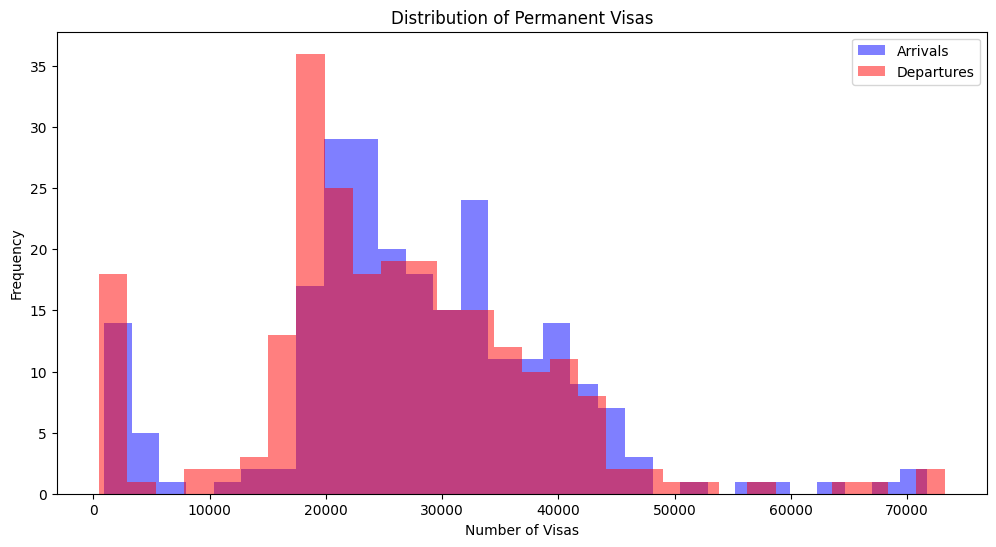

In [6]:
plt.figure(figsize=(12, 6))
travel_data_ARR['Permanent Visas - Total'].plot(kind='hist', alpha=0.5, bins=30, label='Arrivals', color='blue')
travel_data_DEP['Permanent Visas - Total'].plot(kind='hist', alpha=0.5, bins=30, label='Departures', color='red')
plt.legend()
plt.title('Distribution of Permanent Visas')
plt.xlabel('Number of Visas')
plt.ylabel('Frequency')
plt.show()

# Sub-Category Pie Chart 
This is a pie chart that introduces us to what makes up the category Permanent Visas - Total. These 3 sub-cateogries consists of Other Visas, Family Visas and Skilled Visas. 

**Quick Explanation:**

**Other Visas** -  refers to a category of permanent residency visas that do not fall into the primary classifications of skilled, family, or humanitarian visas. It includes a variety of less common permanent residency options

**Skilled Visas** - are visas that are designed for individuals with specific skills and qualifications needed in a country. They are part of a broader skilled migration program aimed at attracting skilled workers to contribute to the economy.

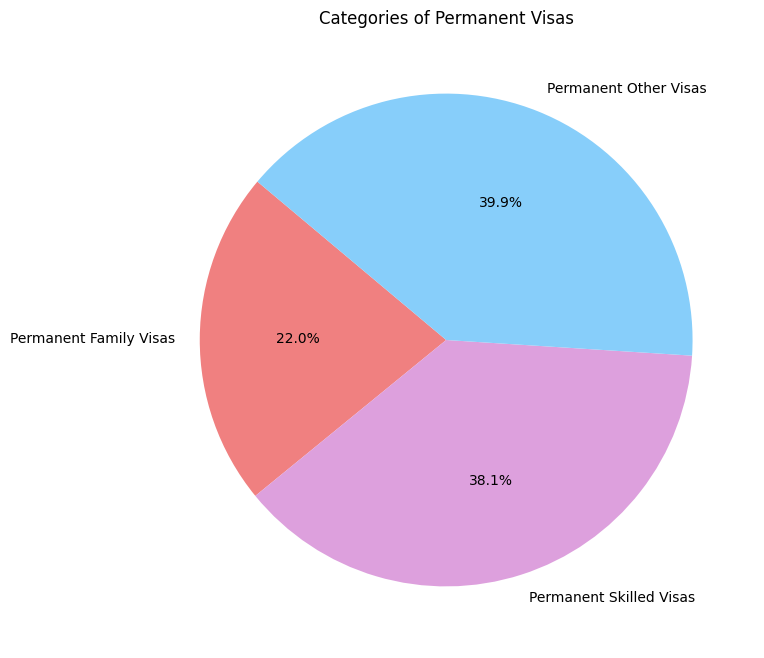

In [7]:
categories = ['Permanent Family Visas', 'Permanent Skilled Visas','Permanent Other Visas']
values = [4005390.0, 6930410.0, 7260460.0]
colors = ['lightcoral','plum','lightskyblue']

plt.figure(figsize=(8, 8))  # Optional: Set the figure size
plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=140, colors=colors)
# Add a title
plt.title('Categories of Permanent Visas')

# Show the plot
plt.show()

# Distribution of Temporary Student Visas

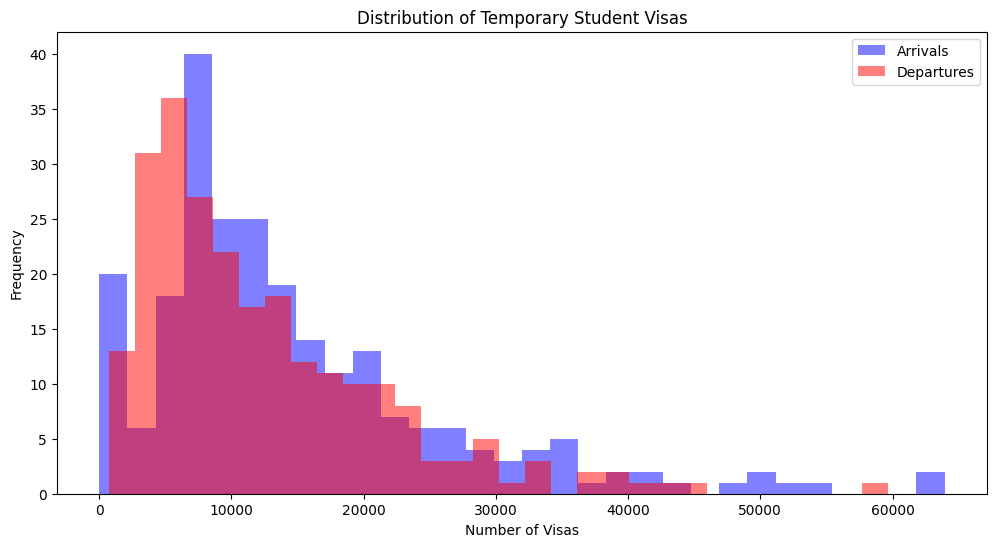

In [8]:
plt.figure(figsize=(12, 6))
travel_data_ARR['Temporary Student Visas - Total'].plot(kind='hist', alpha=0.5, bins=30, label='Arrivals', color='blue')
travel_data_DEP['Temporary Student Visas - Total'].plot(kind='hist', alpha=0.5, bins=30, label='Departures', color='red')
plt.legend()
plt.title('Distribution of Temporary Student Visas')
plt.xlabel('Number of Visas')
plt.ylabel('Frequency')
plt.show()

# Sub-Category Pie Chart
This pie chart is representation of what makes up the category Permanent Visas - Total. The sub-categories can include visas in Higher Education, VET, Schools, ELICO, Postgraduates, and other students. 

**Quick explanation:** 

**Schools** -  represents a specific category of student visas for those attending primary or secondary schools. It is used for tracking and analyzing visa data related to international students in these educational settings.

**Independent ELICOS** - refers to visas issued for students enrolled in standalone English language courses offered by independent institutions.

**Other students** - refers to a category of student visas for international students enrolled in educational programs that do not fit into more specific categories (short courses, workshops and seminars, specialised training).

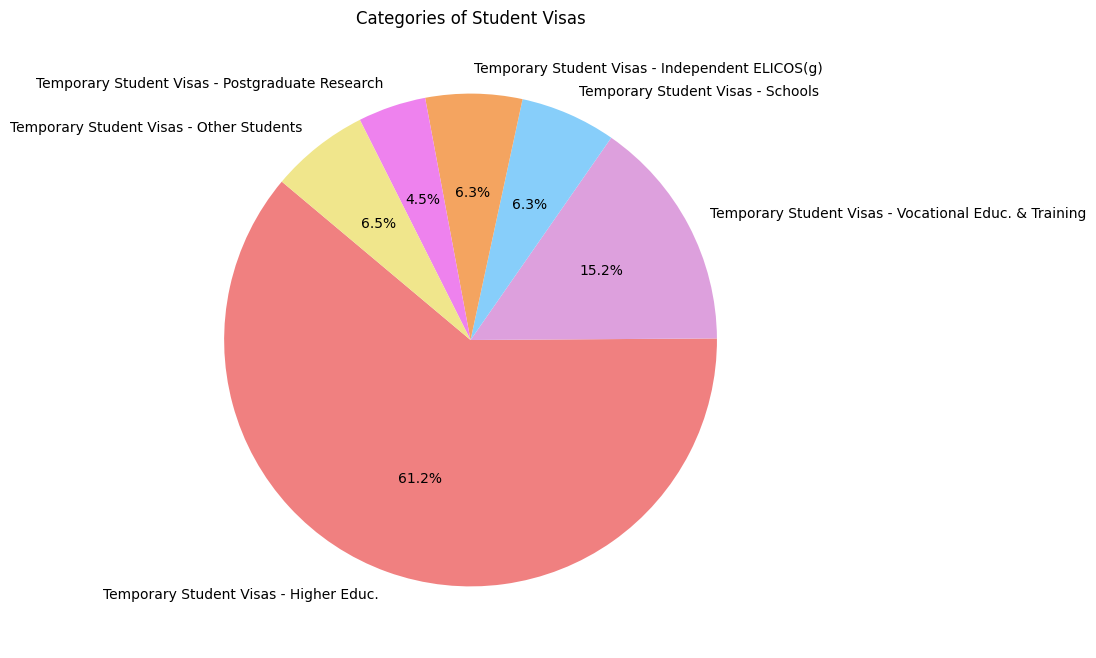

In [9]:
categories = ['Temporary Student Visas - Higher Educ.',
'Temporary Student Visas - Vocational Educ. & Training',
'Temporary Student Visas - Schools',
'Temporary Student Visas - Independent ELICOS(g)',
'Temporary Student Visas - Postgraduate Research',
'Temporary Student Visas - Other Students']
values = [5793070.0, 1441010.0, 594780.0, 600040.0, 422420.0, 612600.0 ]
colors = ['lightcoral','plum','lightskyblue', 'sandybrown', 'violet','khaki']

plt.figure(figsize=(8, 8))  # Optional: Set the figure size
plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=140, colors=colors)
# Add a title
plt.title('Categories of Student Visas')

# Show the plot
plt.show()

Yes. Similarly to the Permanent Skilled Visa, a Temporary Skilled Visa is the same but for a shorter period of time.

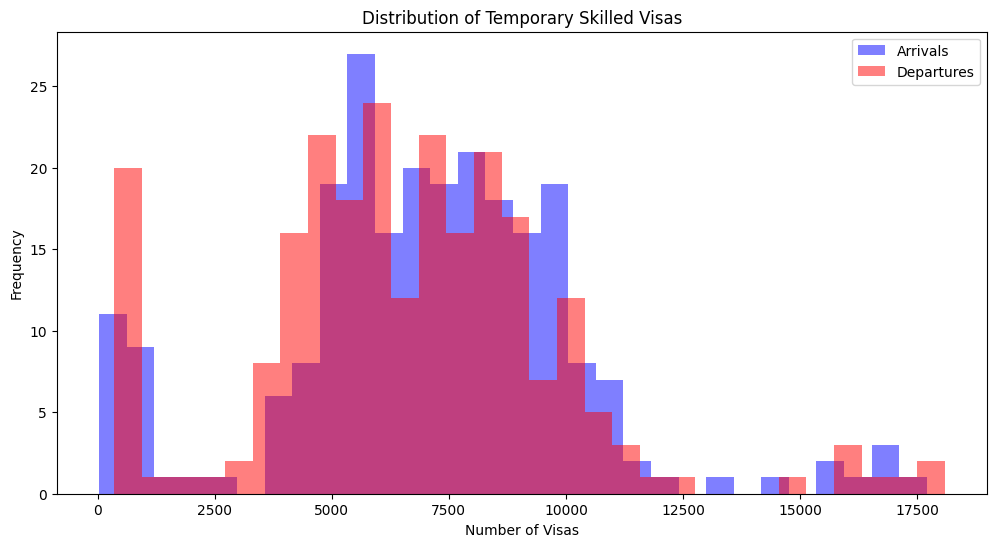

In [10]:
plt.figure(figsize=(12, 6))
travel_data_ARR['Temporary Skilled Visas'].plot(kind='hist', alpha=0.5, bins=30, label='Arrivals', color='blue')
travel_data_DEP['Temporary Skilled Visas'].plot(kind='hist', alpha=0.5, bins=30, label='Departures', color='red')
plt.legend()
plt.title('Distribution of Temporary Skilled Visas')
plt.xlabel('Number of Visas')
plt.ylabel('Frequency')
plt.show()

# PIECHARTS
This section is data to make a piechart.
Permanent Visas - Underlying Categories

In [11]:
sheet_name = 'Overall'  # Specify the sheet name
df = pd.read_excel(excel_file_path_ARR, sheet_name=sheet_name, skiprows=16)

# Strip any extra spaces from column names
df.columns = df.columns.str.strip()

# Specify the correct column names
column_names = [
    'Permanent Family Visas', 
    'Permanent Skilled Visas',
    'Permanent Other Visas'
]  # Ensure these match exactly

# Initialize a dictionary to store the sums for each column
column_sums = {}

# Iterate through each column and calculate the sum separately
for col in column_names:
    try:
        col_sum = df.loc[16:254, col].sum()
        column_sums[col] = col_sum
        print(f"Sum of values in column '{col}' from row 17 to 255: {col_sum}")
    except KeyError as e:
        print(f"Error: The column '{col}' was not found in the DataFrame.")
        print(e)

# Optionally, you can print the final dictionary with all sums
print("\nFinal sums for each column:")
for col, sum_value in column_sums.items():
    print(f"{col}: {sum_value}")

Sum of values in column 'Permanent Family Visas' from row 17 to 255: 4005390.0
Sum of values in column 'Permanent Skilled Visas' from row 17 to 255: 6930410.0
Sum of values in column 'Permanent Other Visas' from row 17 to 255: 7260460.0

Final sums for each column:
Permanent Family Visas: 4005390.0
Permanent Skilled Visas: 6930410.0
Permanent Other Visas: 7260460.0


In [12]:
excel_file = pd.ExcelFile(excel_file_path_ARR) 
print("Sheet names:", excel_file.sheet_names)

date_format = "%m-%Y"

date_parser = lambda x: pd.to_datetime(x, format=date_format)

excel_file = pd.ExcelFile(excel_file_path_ARR)

print("Sheet names:", excel_file.sheet_names)

sheets = ['NSW', 'VIC', 'QLD', 'SA', 'WA', 'TAS', 'NT', 'ACT']
dataframes = {}

for sheet in sheets:
    ARR_DF = pd.read_excel(excel_file, sheet_name=sheet, skiprows=15, parse_dates=["Month"], skipfooter=1)
    ARR_DF.columns = ['Month', 'Special_Category_Visa', 'P_Fam_Visas', 'P_Skilled_Visas', 'P_Other_Visas', 'P_Visas_TOTAL', 'T_Student_Visas_HiEd', 'T_Student_Visas_VET', 'T_Student_Visas_Schools', 'T_Student_Visas_INDP_ELICOS(f)', 'T_Student_Visas_PGrad_Research', 'T_Student_Visas_Other_Students', 'T_Student_Visas_TOTAL', 'T_Skilled_Visas', 'T_Visitor_Visas', 'T_Work_Visas', 'T_Other_Visas', 'T_Visas_TOTAL', 'Other_Visas(g)', 'TOTAL(h)']
    dataframes[sheet] = ARR_DF

for sheet, ARR_DF in dataframes.items():
    print(f"{sheet} data:")
    print(ARR_DF.head(10))

Sheet names: ['Contents', 'NSW', 'VIC', 'QLD', 'SA', 'WA', 'TAS', 'NT', 'ACT', 'Overall']
Sheet names: ['Contents', 'NSW', 'VIC', 'QLD', 'SA', 'WA', 'TAS', 'NT', 'ACT', 'Overall']


C:\Users\ameli\AppData\Local\Temp\ipykernel_7756\257317128.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ARR_DF = pd.read_excel(excel_file, sheet_name=sheet, skiprows=15, parse_dates=["Month"], skipfooter=1)
C:\Users\ameli\AppData\Local\Temp\ipykernel_7756\257317128.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ARR_DF = pd.read_excel(excel_file, sheet_name=sheet, skiprows=15, parse_dates=["Month"], skipfooter=1)
C:\Users\ameli\AppData\Local\Temp\ipykernel_7756\257317128.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ARR_DF = pd.read_excel(excel_file, she

NSW data:
       Month  Special_Category_Visa  P_Fam_Visas  P_Skilled_Visas  \
0 2004-07-01                37390.0       5170.0           8550.0   
1 2004-08-01                37500.0       5130.0           6710.0   
2 2004-09-01                36180.0       4490.0           6710.0   
3 2004-10-01                39900.0       5170.0           7140.0   
4 2004-11-01                33620.0       4470.0           6190.0   
5 2004-12-01                40660.0       4330.0           5990.0   
6 2005-01-01                41720.0       7430.0          11580.0   
7 2005-02-01                32290.0       5020.0           7630.0   
8 2005-03-01                37620.0       5500.0           7250.0   
9 2005-04-01                36690.0       4990.0           8000.0   

   P_Other_Visas  P_Visas_TOTAL  T_Student_Visas_HiEd  T_Student_Visas_VET  \
0         9060.0        22790.0                6850.0               1860.0   
1         7580.0        19430.0                2110.0                870.0

In [13]:
excel_file = pd.ExcelFile(excel_file_path_DEP) 
print("Sheet names:", excel_file.sheet_names)

date_format = "%m-%Y"

date_parser = lambda x: pd.to_datetime(x, format=date_format)

excel_file = pd.ExcelFile(excel_file_path_DEP)

print("Sheet names:", excel_file.sheet_names)

sheets = ['NSW', 'VIC', 'QLD', 'SA', 'WA', 'TAS', 'NT', 'ACT']
dataframes = {}

for sheet in sheets:
    DEP_DF = pd.read_excel(excel_file, sheet_name=sheet, skiprows=15, parse_dates=["Month"], skipfooter=1)
    DEP_DF.columns = ['Month', 'Special_Category_Visa', 'P_Fam_Visas', 'P_Skilled_Visas', 'P_Other_Visas', 'P_Visas_TOTAL', 'T_Student_Visas_HiEd', 'T_Student_Visas_VET', 'T_Student_Visas_Schools', 'T_Student_Visas_INDP_ELICOS(f)', 'T_Student_Visas_PGrad_Research', 'T_Student_Visas_Other_Students', 'T_Student_Visas_TOTAL', 'T_Skilled_Visas', 'T_Visitor_Visas', 'T_Work_Visas', 'T_Other_Visas', 'T_Visas_TOTAL', 'Other_Visas(g)', 'TOTAL(h)']
    dataframes[sheet] = DEP_DF

for sheet, DEP_DF in dataframes.items():
    print(f"{sheet} data:")
    print(DEP_DF.head(10))

Sheet names: ['Contents', 'NSW', 'VIC', 'QLD', 'SA', 'WA', 'TAS', 'NT', 'ACT', 'Overall']
Sheet names: ['Contents', 'NSW', 'VIC', 'QLD', 'SA', 'WA', 'TAS', 'NT', 'ACT', 'Overall']
NSW data:
       Month  Special_Category_Visa  P_Fam_Visas  P_Skilled_Visas  \
0 2004-07-01                38770.0       4500.0           5860.0   
1 2004-08-01                37630.0       3420.0           5480.0   
2 2004-09-01                33670.0       3640.0           5560.0   
3 2004-10-01                39950.0       3520.0           5820.0   
4 2004-11-01                32770.0       4080.0           6390.0   
5 2004-12-01                42010.0       6630.0          10430.0   
6 2005-01-01                38910.0       3650.0           6610.0   
7 2005-02-01                30110.0       3400.0           5660.0   
8 2005-03-01                34590.0       4140.0           5700.0   
9 2005-04-01                37410.0       3600.0           6470.0   

   P_Other_Visas  P_Visas_TOTAL  T_Student_Visas_H

# Data Breakdown

This section will provide a detailed data breakdown using a combination of graphs and line plots. It will visually represent the number of visas issued over time, showing how trends, as well as other influencing variables, have impacted visa usage. By analysing these visualisations, we can gain insights into the factors driving the popularity of different visa categories. 

# Permanent Visas (Arrival)

This histogram gives an overview into the data of each states, specifically displaying the three sub-categories of Permanent Visas providing an immediate understanding of the distribution and magnitude of visas across different states. 

Some Key Observations: 

New South Wales and Victoria have the highest total visa counts, with NSW slightly leading. Both states show a significant number of Permanent Skilled and Permanent Other Visas, reflecting their role as major economic and migration hubs in Australia.

Western Australia also has a substantial number of visas, primarily driven by Permanent Skilled Visas, which may be linked to the state's strong demand for skilled labor.

Queensland, though having fewer visas than NSW, VIC, and WA, shows a similar pattern with a mix of visa types.

South Australia, Tasmania, Australian Capital Territory, and Northern Territory have considerably lower visa counts, reflecting their smaller populations and possibly fewer opportunities for migrants.

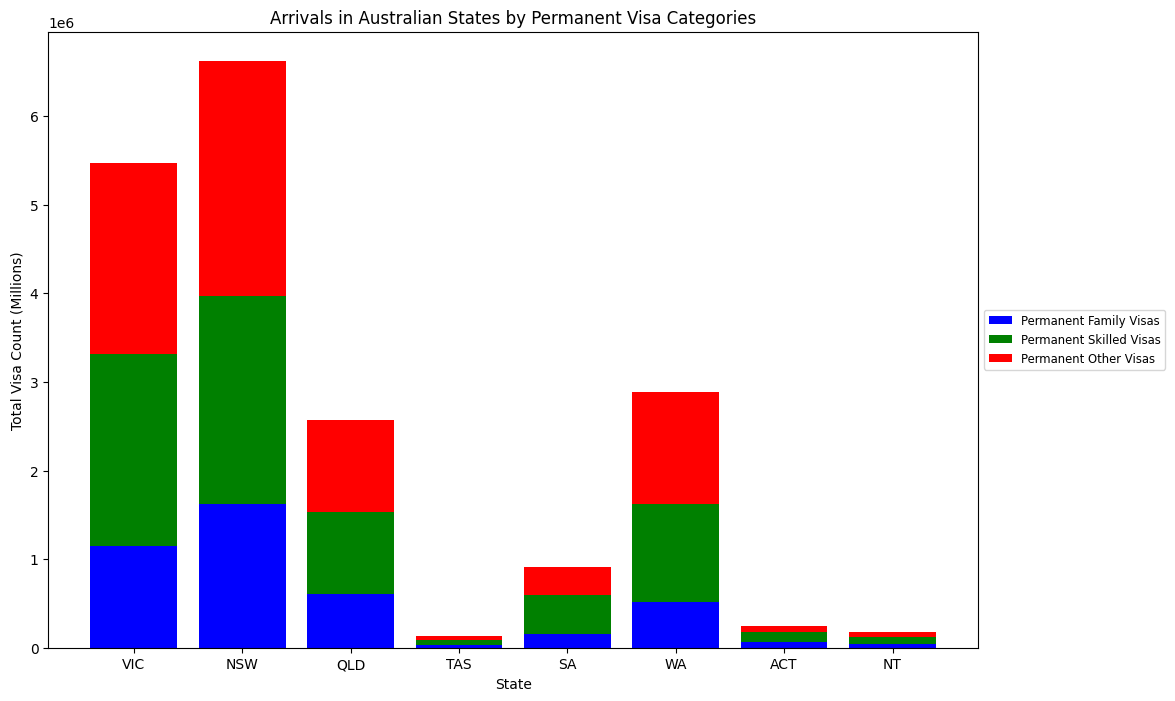

In [14]:
states = ['VIC', 'NSW', 'QLD', 'TAS', 'SA', 'WA', 'ACT', 'NT']

# Read data from Excel into a dictionary of DataFrames
data = {}
for state in states:
    data[state] = pd.read_excel(excel_file_path_ARR, sheet_name=state, skiprows=15)

# Example categories, make sure these match the column names in your Excel file
categories = ['Permanent Family Visas', 'Permanent Skilled Visas', 'Permanent Other Visas']
colors = ['blue', 'green', 'red']

# Prepare the data for the stacked bar chart
values = {}
for category in categories:
    values[category] = [data[state][category].sum() for state in states]  # Sum the values for each state

# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(12, 8))

bottom_values = np.zeros(len(states))
for idx, category in enumerate(categories):
    ax.bar(states, values[category], bottom=bottom_values, color=colors[idx], label=category)
    bottom_values += values[category]

# Add titles and labels
plt.title('Arrivals in Australian States by Permanent Visa Categories')
plt.xlabel('State')
plt.ylabel('Total Visa Count (Millions)')

# Add a legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')

# Display the plot
plt.show()

# Key observations:

New South Wales  and Victoria consistently lead in the number of permanent visas issued, with NSW typically maintaining a slight edge. These states show a steady increase in visas over the years, peaking regularly, likely corresponding to specific migration cycles or policies.

Queensland, Western Australia, and South Australia show moderate visa numbers, with WA showing a significant rise during certain periods, possibly linked to economic booms, particularly in mining and resources.

Tasmania, Australian Capital Territory, and Northern Territory have relatively low visa numbers, reflecting their smaller populations and possibly fewer migration opportunities.

A notable dip across all states occurs around 2020, corresponding with the global COVID-19 pandemic, which likely led to a reduction in immigration due to border closures and travel restrictions.

Post-2020, there is a sharp recovery in visa numbers, especially in NSW and VIC, indicating a resurgence in migration as restrictions eased and economic activities resumed.

## Some important information: 

From 2012 onwards, there were  in the numbers of permanent visas. This is due to the changes of migration policies in 2013-2017. 
In 2013-2014, Australia expanded its skilled migration program, increasing visa numbers. However, in 2017, the abolition of the Subclass 457 visa and the introduction of the more restrictive TSS visa, with stricter criteria and a reduced occupations list, led to a temporary decrease in skilled visa approvals as the system adjusted to the new rules

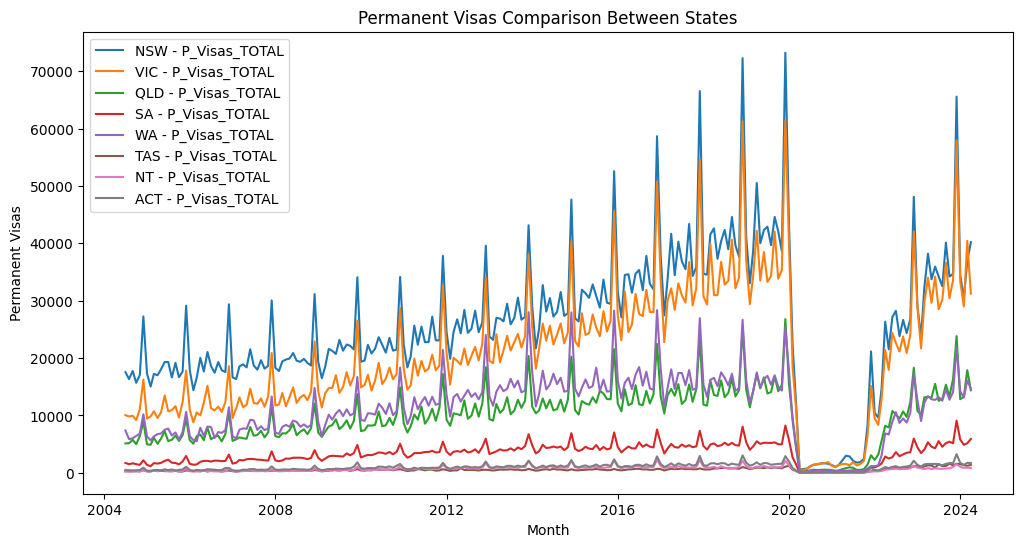

In [15]:
plt.figure(figsize=(12, 6))

for sheet, ARR_DF in dataframes.items():
    
    if 'Month' in ARR_DF.columns and 'P_Visas_TOTAL' in ARR_DF.columns:
        ARR_DF['Month'] = pd.to_datetime(ARR_DF['Month'], errors='coerce')
        ARR_DF['P_Visas_TOTAL'] = pd.to_numeric(ARR_DF['P_Visas_TOTAL'], errors='coerce')
        
        if sheet != 'Overall':
            plt.plot(ARR_DF['Month'], ARR_DF['P_Visas_TOTAL'], label=f'{sheet} - P_Visas_TOTAL')
    else:
        print(f"Sheet {sheet} is missing 'Month' or 'P_Visas_TOTAL'")

plt.xlabel('Month')
plt.ylabel('Permanent Visas')
plt.title('Permanent Visas Comparison Between States')
plt.legend()
plt.show()

# Permanent Visas (Departures)

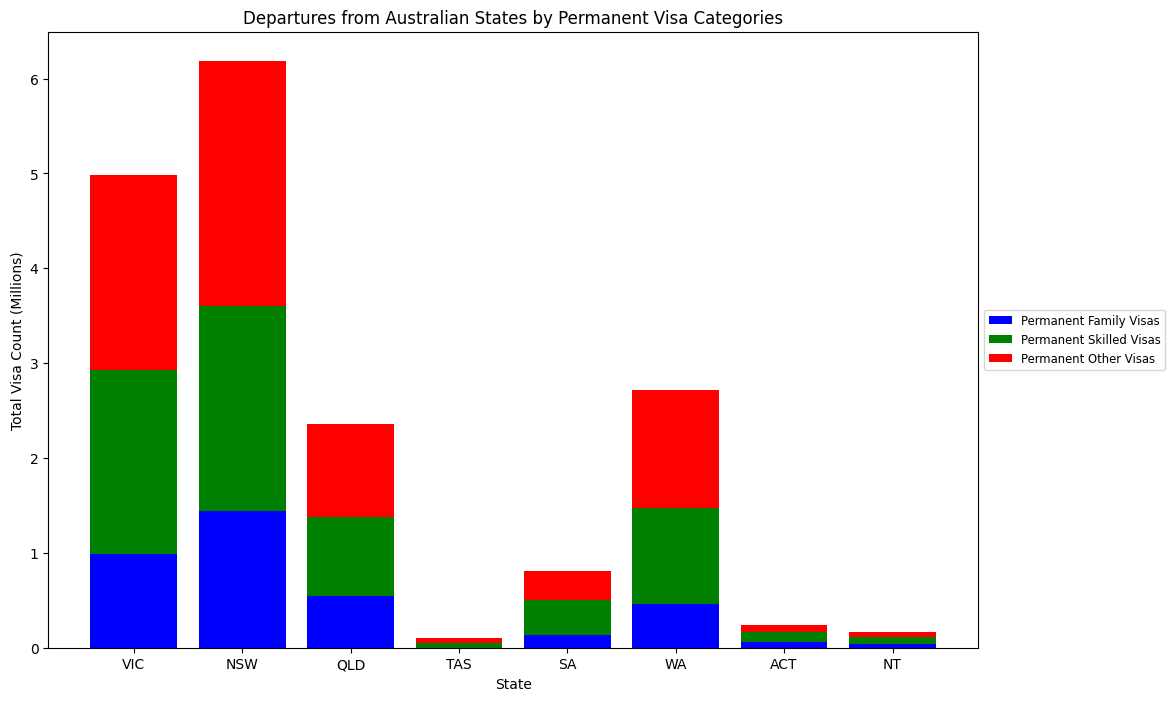

In [16]:
excel_file_path_DEP = r"C:\Users\ameli\1161\travel_dataproject\data_introduction\3401017 Visas DEP.xlsx"
states = ['VIC', 'NSW', 'QLD', 'TAS', 'SA', 'WA', 'ACT', 'NT']

# Read data from Excel into a dictionary of DataFrames
data = {}
for state in states:
    df = pd.read_excel(excel_file_path_DEP, sheet_name=state, skiprows=15)
    df.columns = df.columns.str.strip()  # Strip extra spaces from column names
    data[state] = df

# Example categories, ensure these match the column names in your Excel file
categories = ['Permanent Family Visas', 'Permanent Skilled Visas', 'Permanent Other Visas']
colors = ['blue', 'green', 'red']

# Prepare the data for the stacked bar chart
values = {}
for category in categories:
    values[category] = []
    for state in states:
        if category in data[state].columns:
            values[category].append(data[state][category].sum() / 1_000_000)
        else:
            values[category].append(0)  # Handle missing columns

# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(12, 8))

bottom_values = np.zeros(len(states))
for idx, category in enumerate(categories):
    ax.bar(states, values[category], bottom=bottom_values, color=colors[idx], label=category)
    bottom_values += values[category]

# Add titles and labels
plt.title('Departures from Australian States by Permanent Visa Categories')
plt.xlabel('State')
plt.ylabel('Total Visa Count (Millions)')

# Add a legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')

# Display the plot
plt.show()

<Figure size 1200x600 with 0 Axes>

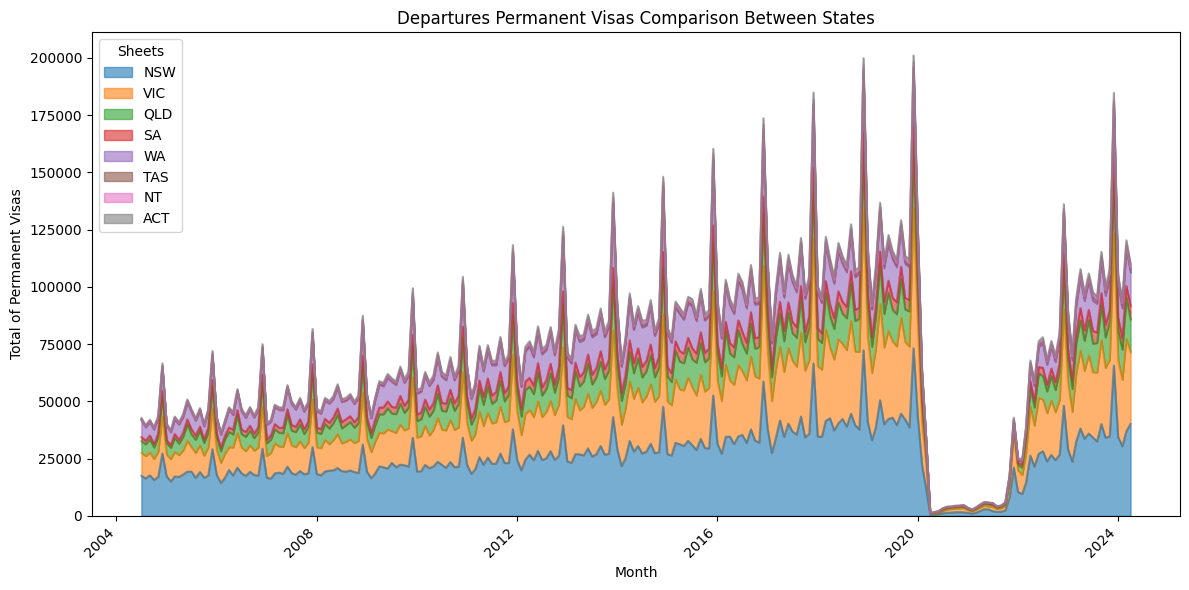

In [17]:
plt.figure(figsize=(12, 6))

# Dictionary to hold data for stacking
data_to_stack = {}

for sheet, DEP_DF in dataframes.items():
    
    if 'Month' in DEP_DF.columns and 'P_Visas_TOTAL' in DEP_DF.columns:
        DEP_DF['Month'] = pd.to_datetime(DEP_DF['Month'], errors='coerce')
        DEP_DF['P_Visas_TOTAL'] = pd.to_numeric(DEP_DF['P_Visas_TOTAL'], errors='coerce')
        
        if sheet != 'Overall':
            data_to_stack[sheet] = DEP_DF.set_index('Month')['P_Visas_TOTAL']
    else:
        print(f"Sheet {sheet} is missing 'Month' or 'P_Visas_TOTAL'")

# Concatenate all series into a DataFrame
stacked_df = pd.DataFrame(data_to_stack)

# Plot the stacked area plot
stacked_df.plot.area(figsize=(12, 6), alpha=0.6)

plt.xlabel('Month')
plt.ylabel('Total of Permanent Visas')
plt.title('Departures Permanent Visas Comparison Between States')
plt.legend(title='Sheets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Temporary Student Visas

**Seasonal Peaks in Student Visa Arrivals from Australia**:

**Academic Year Start** : Peaks typically occur in late summer and early fall (August/September) as students arrive for the new academic year.

**Application Deadlines**: Increased visa arrivals often follow university application deadlines, as students finalise their travel plans after acceptance.

**Program Start Dates**: Specific program start dates and scholarship deadlines can drive higher visa arrival numbers.

**International Recruitment Events**: Peaks may also align with university recruitment activities and orientation events.

**Holiday Timing**: Visa arrivals can surge before major holidays or academic breaks as students prepare for travel.

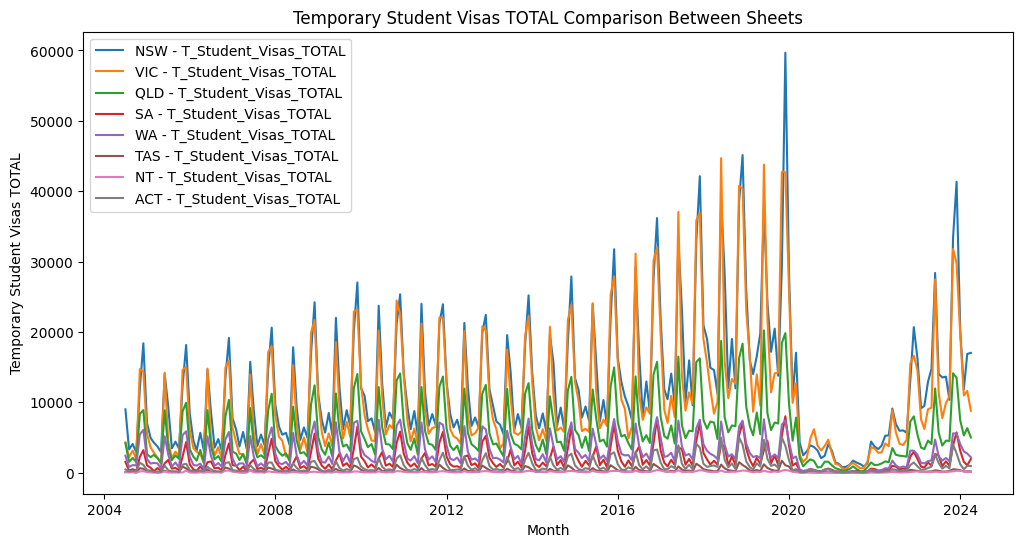

In [18]:
plt.figure(figsize=(12, 6))

for sheet, ARR_DF in dataframes.items():
    
    if 'Month' in ARR_DF.columns and 'T_Student_Visas_TOTAL' in ARR_DF.columns:
        ARR_DF['Month'] = pd.to_datetime(ARR_DF['Month'], errors='coerce')
        ARR_DF['T_Student_Visas_TOTAL'] = pd.to_numeric(ARR_DF['T_Student_Visas_TOTAL'], errors='coerce')
        
        if sheet != 'Overall':
            plt.plot(ARR_DF['Month'], ARR_DF['T_Student_Visas_TOTAL'], label=f'{sheet} - T_Student_Visas_TOTAL')
    else:
        print(f"Sheet {sheet} is missing 'Month' or 'T_Student_Visas_TOTAL'")

plt.xlabel('Month')
plt.ylabel('Temporary Student Visas TOTAL')
plt.title('Temporary Student Visas TOTAL Comparison Between Sheets')
plt.legend()
plt.show()

**Seasonal Peaks in Student Visa Departures from Australia**:

**End of Academic Terms**: Peaks in departures typically occur at the end of the academic year (November/December) or semester breaks, as students finish their studies or go on vacation.

**Graduation Periods**: Increased departures often align with graduation ceremonies and the completion of academic programs.

**Holidays and Breaks**: There may be higher departure rates before major holidays or breaks when students return home for extended periods.

**Program Completion**: Students finishing short-term courses or exchange programs may also contribute to seasonal peaks in departures.

<Figure size 1200x600 with 0 Axes>

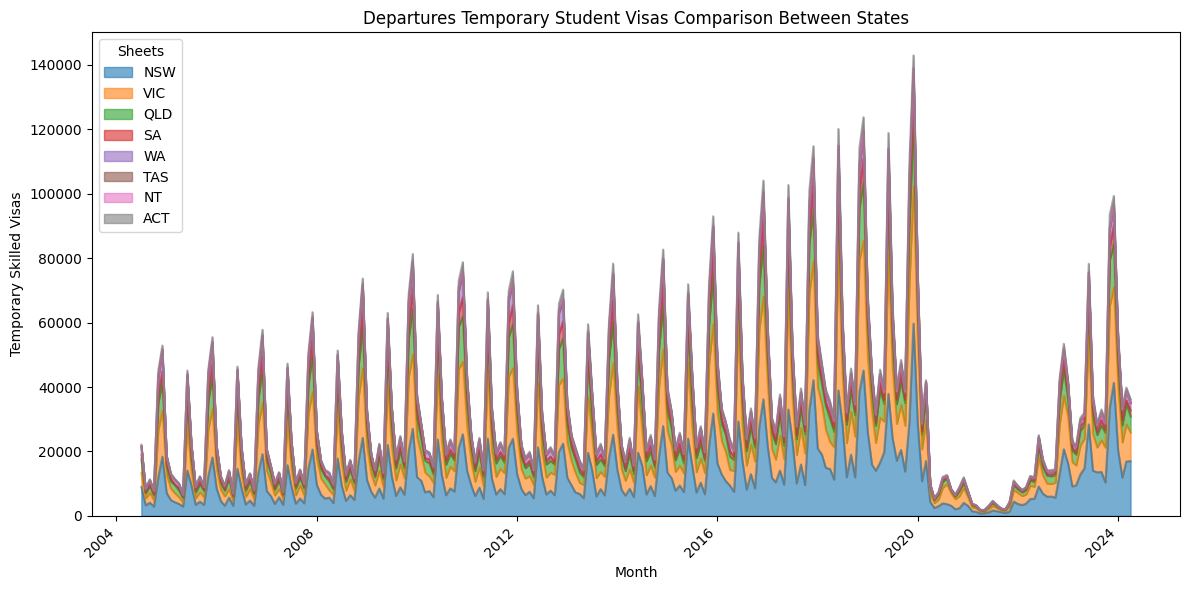

In [19]:
plt.figure(figsize=(12, 6))

# Dictionary to hold data for stacking
data_to_stack = {}

for sheet, DEP_DF in dataframes.items():
    
    if 'Month' in DEP_DF.columns and 'T_Student_Visas_TOTAL' in DEP_DF.columns:
        DEP_DF['Month'] = pd.to_datetime(DEP_DF['Month'], errors='coerce')
        DEP_DF['T_Student_Visas_TOTAL'] = pd.to_numeric(DEP_DF['T_Student_Visas_TOTAL'], errors='coerce')
        
        if sheet != 'Overall':
            data_to_stack[sheet] = DEP_DF.set_index('Month')['T_Student_Visas_TOTAL']
    else:
        print(f"Sheet {sheet} is missing 'Month' or 'T_Student_Visas_TOTAL'")

# Concatenate all series into a DataFrame
stacked_df = pd.DataFrame(data_to_stack)

# Plot the stacked area plot
stacked_df.plot.area(figsize=(12, 6), alpha=0.6)

plt.xlabel('Month')
plt.ylabel('Temporary Skilled Visas')
plt.title('Departures Temporary Student Visas Comparison Between States')
plt.legend(title='Sheets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Temporary Skilled Visas

Similarly to the Permanent Visas' sub-category of Skilled Visas, this cateogry of visas is very similar. To which trends that are consistently seen through the graphs is how NSW, VIC and QLD have the highest number of visas, while other states have much lower numbers, exhibiting the regional disparities in skilled labour demand. 

# Key Observations for both the Arrivals and Departures: 

**Seasonal Patterns**: There are distinct seasonal peaks, suggesting higher visa issuance during specific times of the year, possibly tied to business cycles or the academic calendar.

**Impact of Global Events**: A significant decline around 2020 likely results from the COVID-19 pandemic's impact on travel and economic activity.

**Recent Trends**: Post-2020, there is a noticeable recovery, indicating a resurgence in demand for skilled workers as global conditions improve.

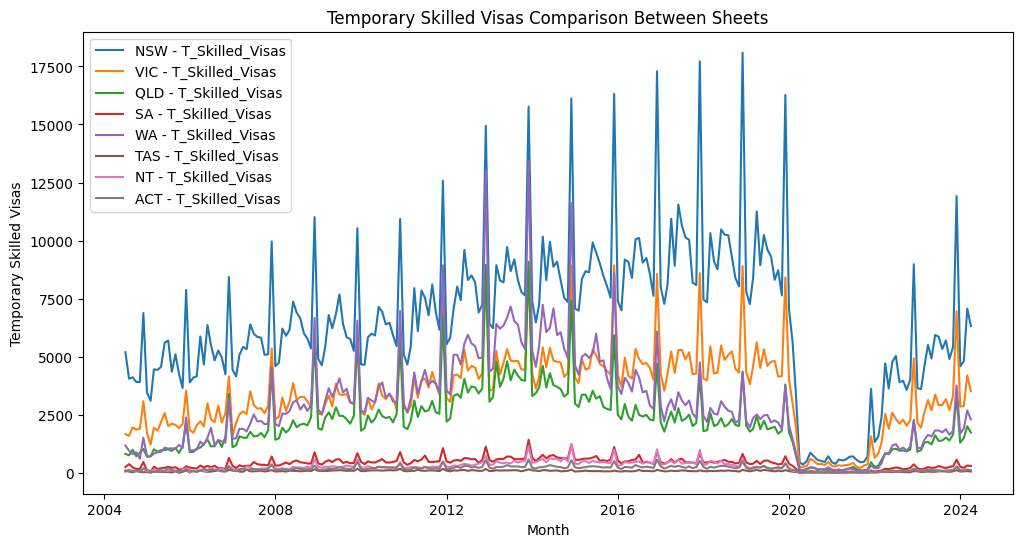

In [20]:
plt.figure(figsize=(12, 6))

for sheet, ARR_DF in dataframes.items():
    
    if 'Month' in ARR_DF.columns and 'T_Skilled_Visas' in ARR_DF.columns:
        ARR_DF['Month'] = pd.to_datetime(ARR_DF['Month'], errors='coerce')
        ARR_DF['T_Skilled_Visas'] = pd.to_numeric(ARR_DF['T_Skilled_Visas'], errors='coerce')
        
        if sheet != 'Overall':
            plt.plot(ARR_DF['Month'], ARR_DF['T_Skilled_Visas'], label=f'{sheet} - T_Skilled_Visas')
    else:
        print(f"Sheet {sheet} is missing 'Month' or 'T_Skilled_Visas'")

plt.xlabel('Month')
plt.ylabel('Temporary Skilled Visas')
plt.title('Temporary Skilled Visas Comparison Between Sheets')
plt.legend()
plt.show()

<Figure size 1200x600 with 0 Axes>

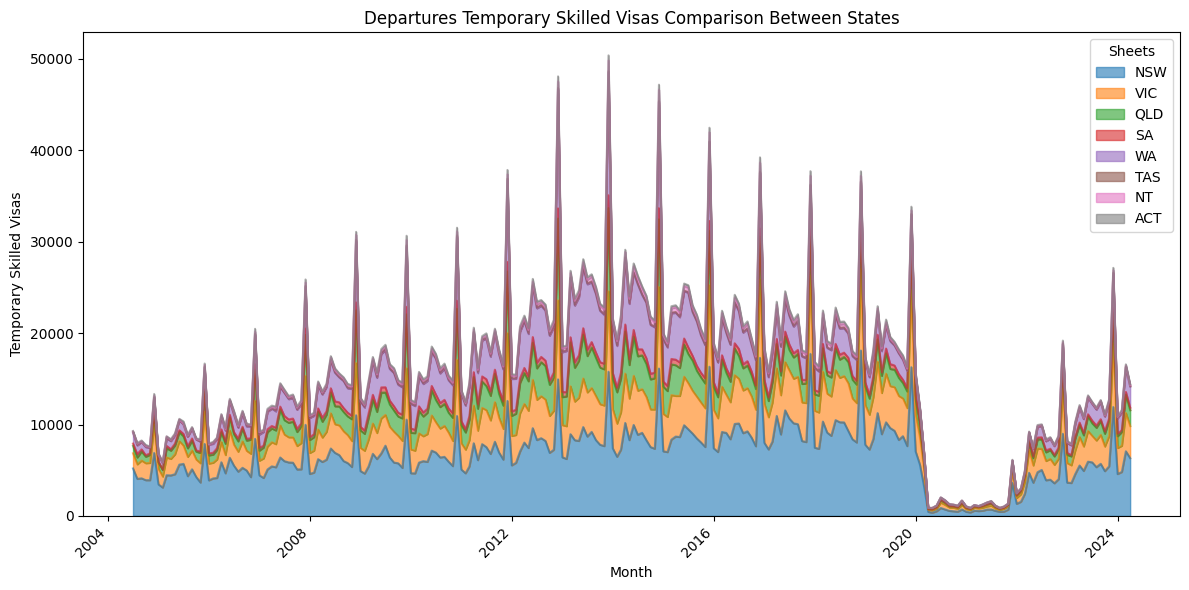

In [21]:
plt.figure(figsize=(12, 6))

# Dictionary to hold data for stacking
data_to_stack = {}

for sheet, DEP_DF in dataframes.items():
    
    if 'Month' in DEP_DF.columns and 'T_Skilled_Visas' in DEP_DF.columns:
        DEP_DF['Month'] = pd.to_datetime(DEP_DF['Month'], errors='coerce')
        DEP_DF['T_Skilled_Visas'] = pd.to_numeric(DEP_DF['T_Skilled_Visas'], errors='coerce')
        
        if sheet != 'Overall':
            data_to_stack[sheet] = DEP_DF.set_index('Month')['T_Skilled_Visas']
    else:
        print(f"Sheet {sheet} is missing 'Month' or 'T_Skilled_Visas'")

# Concatenate all series into a DataFrame
stacked_df = pd.DataFrame(data_to_stack)

# Plot the stacked area plot
stacked_df.plot.area(figsize=(12, 6), alpha=0.6)

plt.xlabel('Month')
plt.ylabel('Temporary Skilled Visas')
plt.title('Departures Temporary Skilled Visas Comparison Between States')
plt.legend(title='Sheets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
if 'P_Fam_Visas' in travel_data_ARR.columns and 'Permanent Family Visas' in travel_data_DEP.columns:
    # Optional: Convert columns to numeric if needed
    travel_data_ARR['P_Fam_Visas'] = pd.to_numeric(travel_data_ARR['P_Fam_Visas'], errors='coerce')
    travel_data_DEP['Permanent Family Visas'] = pd.to_numeric(travel_data_DEP['Permanent Family Visas'], errors='coerce')

    # Create the figure
    plt.figure(figsize=(12, 6))

    # Plot histograms for arrivals and departures
    travel_data_ARR['P_Fam_Visas'].plot(kind='hist', bins=30, alpha=0.5, label='Departures', color='red')
    travel_data_DEP['Permanent Family Visas'].plot(kind='hist', bins=30, alpha=0.5, label='Arrivals', color='blue')

    # Adding labels, title, and legend
    plt.legend()
    plt.title('Distribution of Family Visas')
    plt.xlabel('Number of Visas')
    plt.ylabel('Frequency')  # Added y-axis label for clarity

    # Show the plot
    plt.show()
else:
    print("One or both columns are missing or misnamed in the DataFrames.")

One or both columns are missing or misnamed in the DataFrames.


# Map
I intended to create a choropleth map highlighting the states that are more popular in terms of visa applications. However, I encountered technical difficulties that prevented me from achieving the desired result. Despite this, I still wanted to showcase the map itself, even in its unfinished form, to provide a visual context for the project.

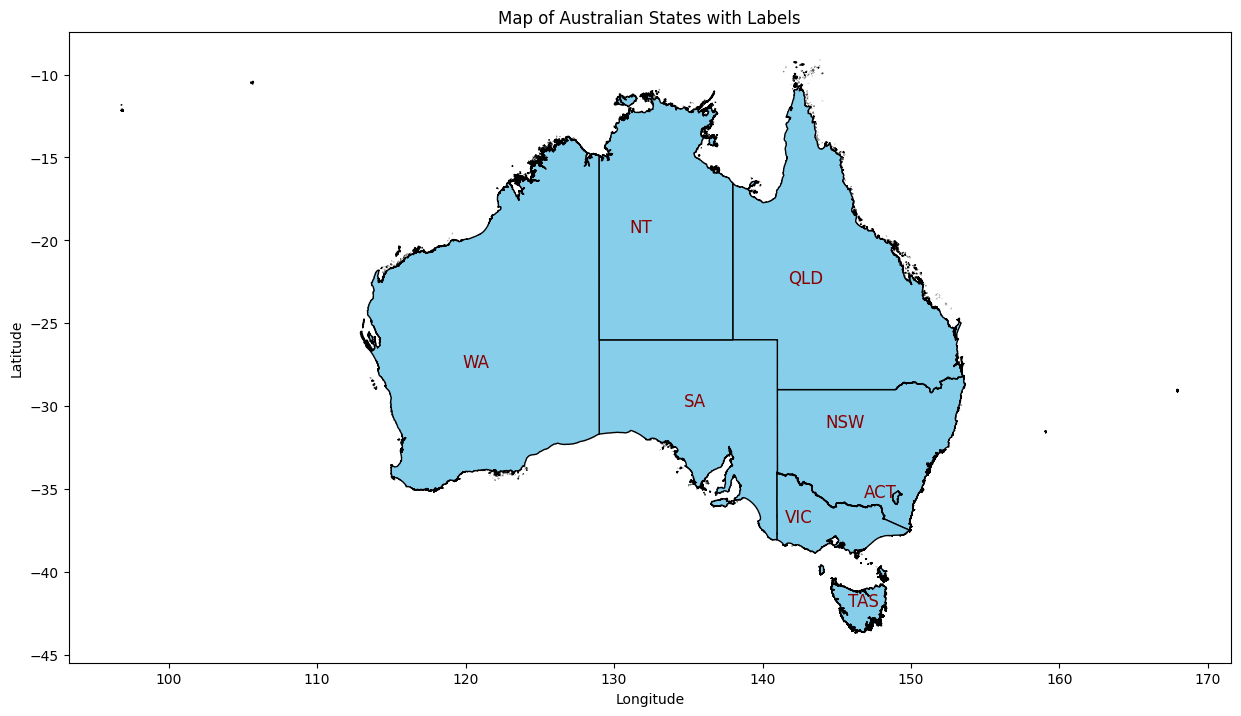

In [23]:
shapefile_path = r"C:\Users\ameli\1161\travel_dataproject\Aus Map Shape.zip"

# Sample data for labels
labels_data = {
    'Location': ['NSW', 'VIC', 'QLD', 'WA', 'SA', 'NT', 'ACT', 'TAS'],
    'Latitude': [-31.2532, -36.9848, -22.5752, -27.6728, -30.0002, -19.4914, -35.4735, -42.0409],
    'Longitude': [146.9211, 143.3906, 144.0848, 121.6283, 136.2092, 132.5510, 149.0124, 147.8087]
}
labels_df = pd.DataFrame(labels_data)

try:
    # Load the shapefile
    gdf = gpd.read_file(shapefile_path)

    # Ensure data types are correct
    labels_df['Latitude'] = pd.to_numeric(labels_df['Latitude'], errors='coerce')
    labels_df['Longitude'] = pd.to_numeric(labels_df['Longitude'], errors='coerce')

    # Plot the map
    fig, ax = plt.subplots(figsize=(15, 15))
    gdf.plot(ax=ax, color='skyblue', edgecolor='black')

    # Add labels
    for idx, row in labels_df.iterrows():
        ax.text(
            row['Longitude'],   # Longitude value from labels_df
            row['Latitude'],    # Latitude value from labels_df
            row['Location'],    # Location name from labels_df
            fontsize=12,
            ha='right',
            color='darkred'
        )

    # Set plot title and labels
    ax.set_title('Map of Australian States with Labels')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    plt.show()

except Exception as e:
    print(f"An error occurred while reading the shapefile: {e}")

# Sum of the categories
**"Permanent Visas - Total", "Temporary Student Visas - Total" and "Temporary Skilled Visas"**  

These histograms were put together to show the data in a neat, organisd way that's easy to read, making it simple to see the different strengths of each state.

For this section of the presentation, I thought it'd be interesting to put the values and graphs of the categories Permanent Visas and Temporary Skilled Visas because it highlights Australia's vibrant employment landscape and underscores the critical role of these visas in supporting sectors like the mining industry. 

In [24]:
sheet_names = ['VIC', 'NSW', 'QLD', 'WA', 'SA', 'TAS', 'ACT', 'NT']  # Update with your actual sheet names

# Initialize a dictionary to store the sum for each sheet
sums = {}

# Iterate over each sheet
for sheet_name in sheet_names:
    # Load the sheet into a DataFrame
    df = pd.read_excel(excel_file_path_ARR, sheet_name=sheet_name, skiprows=15)

    # Strip any extra spaces from column names
    df.columns = df.columns.str.strip()

    # Specify the correct column name
    column_name = 'Permanent Visas - Total'  # Ensure this matches exactly

    # Sum the values from row 17 to 255 (index 16 to 254)
    total_sum = df.loc[16:254, column_name].sum()

    # Store the result in the dictionary
    sums[sheet_name] = total_sum

sums_df = pd.DataFrame(list(sums.items()), columns=['State/Territory', 'Total Permanent Visas'])

# Print the DataFrame
print(sums_df)

  State/Territory  Total Permanent Visas
0             VIC              5271090.0
1             NSW              6289560.0
2             QLD              2455640.0
3              WA              2759120.0
4              SA               880620.0
5             TAS               130910.0
6             ACT               238230.0
7              NT               169200.0


<Figure size 640x480 with 0 Axes>

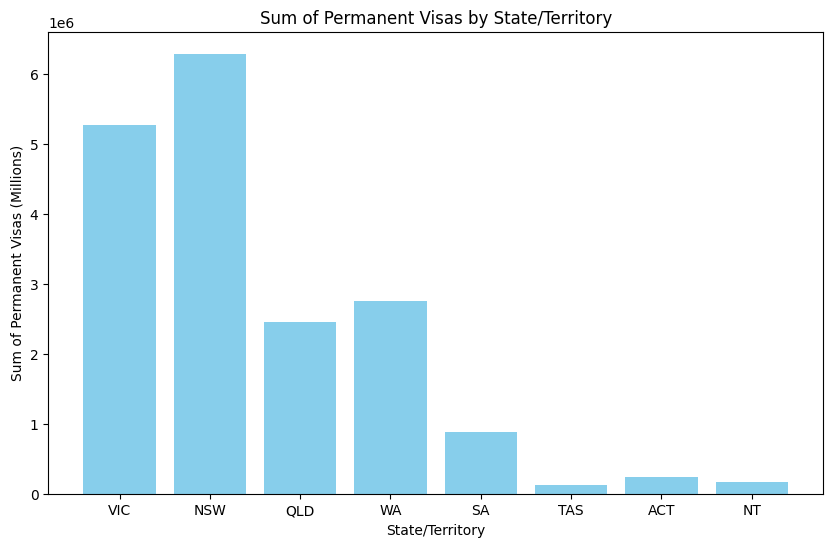

In [40]:
states = ['VIC', 'NSW', 'QLD', 'WA', 'SA', 'TAS', 'ACT', 'NT']
sums = [5271090.0, 6289560.0, 2455640.0, 2759120.0, 880620.0, 130910.0, 238230.0, 169200.0]

plt.clf()
# Create the histogram
plt.figure(figsize=(10, 6))
plt.bar(states, sums, color='skyblue')

# Add titles and labels
plt.title('Sum of Permanent Visas by State/Territory')
plt.xlabel('State/Territory')
plt.ylabel('Sum of Permanent Visas (Millions)')

# Display the plot
plt.show()

In [43]:
sheet_names = ['VIC', 'NSW', 'QLD', 'WA', 'SA', 'TAS', 'ACT', 'NT']  # Update with your actual sheet names

# Initialize a dictionary to store the sum for each sheet
sums = {}

# Iterate over each sheet
for sheet_name in sheet_names:
    # Load the sheet into a DataFrame
    df = pd.read_excel(excel_file_path_ARR, sheet_name=sheet_name, skiprows=15)

    # Strip any extra spaces from column names
    df.columns = df.columns.str.strip()

    # Specify the correct column name
    column_name = 'Temporary Skilled Visas'  # Ensure this matches exactly

    # Sum the values from row 17 to 255 (index 16 to 254)
    total_sum = df.loc[16:254, column_name].sum()

    # Store the result in the dictionary
    sums[sheet_name] = total_sum

sums_df = pd.DataFrame(list(sums.items()), columns=['State/Territory', 'Total Temporary Skilled Visas'])

# Print the DataFrame
print(sums_df)

  State/Territory  Total Temporary Skilled Visas
0             VIC                       881970.0
1             NSW                      1607420.0
2             QLD                       596310.0
3              WA                       751880.0
4              SA                       111250.0
5             TAS                        18270.0
6             ACT                        46600.0
7              NT                        82390.0


Here you can see that in the state WA, is almost at the same marking as VIC. This is due to The mining industry in Australia, specifically in Western Australia. This is because WA heavily relies on international workers, who account for about 19% of its workforce in mining and quarrying. 

This isn’t just a coincidence; it shows a broader trend of skill shortages and the increasing need for skilled professionals from overseas. The mining sector, in particular, really depends on these workers to keep things running smoothly and to drive growth.

<Figure size 640x480 with 0 Axes>

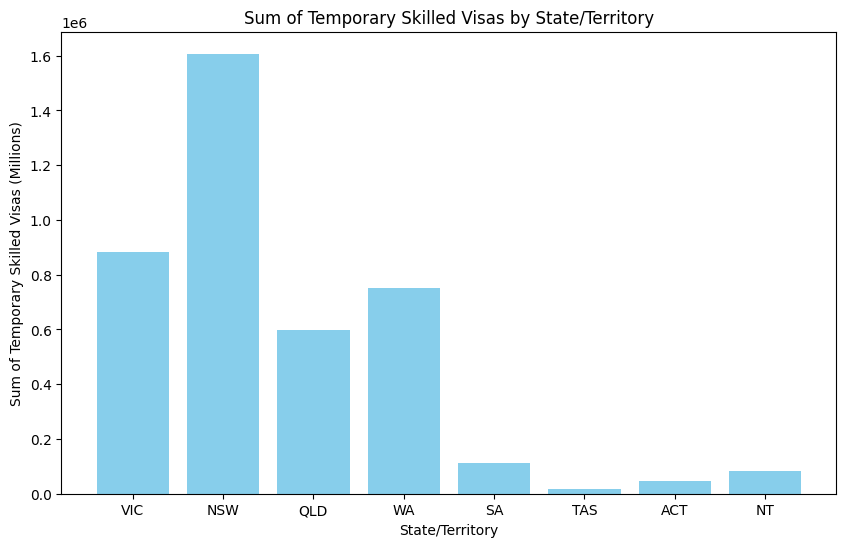

In [44]:
states = ['VIC', 'NSW', 'QLD', 'WA', 'SA', 'TAS', 'ACT', 'NT']
sums = [881970.0, 1607420.0, 596310.0, 751880.0, 111250.0, 18270.0, 46600.0, 82390.0]

plt.clf()
# Create the histogram
plt.figure(figsize=(10, 6))
plt.bar(states, sums, color='skyblue')

# Add titles and labels
plt.title('Sum of Temporary Skilled Visas by State/Territory')
plt.xlabel('State/Territory')
plt.ylabel('Sum of Temporary Skilled Visas (Millions)')

# Display the plot
plt.show()

**Temporary Student Visas**

Similarly to the 2 other categories, I came to realise that student visas are especially popular because states like NSW and VIC offer more tailored programs designed to attract skilled migrants. These states have larger economies and more diverse job markets, which naturally draw more international students. This creates differences in how migrants experience the visa process depending on the state they choose.

In [41]:
sheet_names = ['VIC', 'NSW', 'QLD', 'WA', 'SA', 'TAS', 'ACT', 'NT']  # Update with your actual sheet names

# Initialize a dictionary to store the sum for each sheet
sums = {}

# Iterate over each sheet
for sheet_name in sheet_names:
    # Load the sheet into a DataFrame
    df = pd.read_excel(excel_file_path_ARR, sheet_name=sheet_name, skiprows=15)

    # Strip any extra spaces from column names
    df.columns = df.columns.str.strip()

    # Specify the correct column name
    column_name = 'Temporary Student Visas - Total'  # Ensure this matches exactly

    # Sum the values from row 17 to 255 (index 16 to 254)
    total_sum = df.loc[16:254, column_name].sum()

    # Store the result in the dictionary
    sums[sheet_name] = total_sum

sums_df = pd.DataFrame(list(sums.items()), columns=['State/Territory', 'Total Temporary Student Visas'])

# Print the DataFrame
print(sums_df)

  State/Territory  Total Temporary Student Visas
0             VIC                      2957140.0
1             NSW                      3354840.0
2             QLD                      1523570.0
3              WA                       766570.0
4              SA                       495310.0
5             TAS                        84800.0
6             ACT                       239360.0
7              NT                        42080.0


<Figure size 640x480 with 0 Axes>

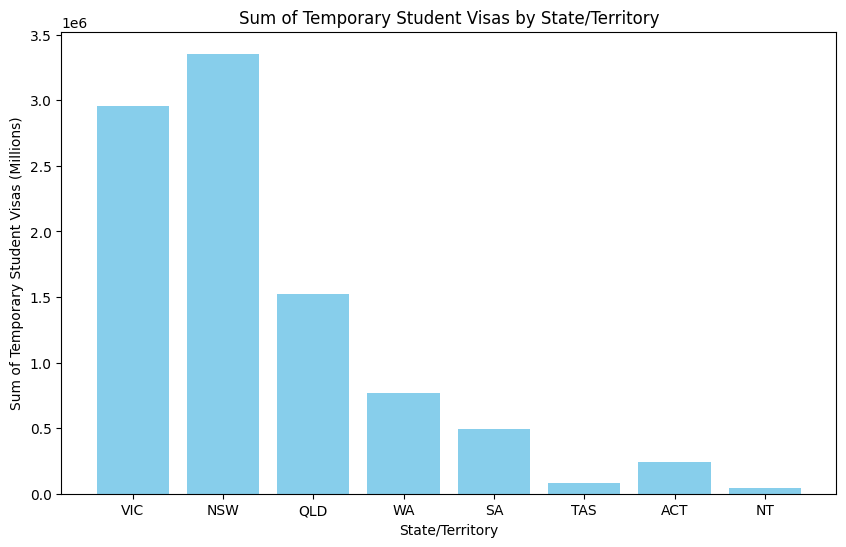

In [42]:
states = ['VIC', 'NSW', 'QLD', 'WA', 'SA', 'TAS', 'ACT', 'NT']
sums = [2957140.0, 3354840.0, 1523570.0, 766570.0, 495310.0, 84800.0, 239360.0, 42080.0]

plt.clf()
# Create the histogram
plt.figure(figsize=(10, 6))
plt.bar(states, sums, color='skyblue')

# Add titles and labels
plt.title('Sum of Temporary Student Visas by State/Territory')
plt.xlabel('State/Territory')
plt.ylabel('Sum of Temporary Student Visas (Millions)')

# Display the plot
plt.show()

# Net Changes Of Permanent Visas

**Comparison between Arrivals and Departures.**

Before creating these graphs, I anticipated a noticeable drop in visa numbers around early 2023. Given the rising inflation, increasing cost of living, and higher university fees for international students, it seemed likely that fewer people would choose to migrate or study in Australia during this period. These factors, I thought, would have made it harder for international students and skilled workers to afford living and studying in the country, leading to a dip in visa applications.

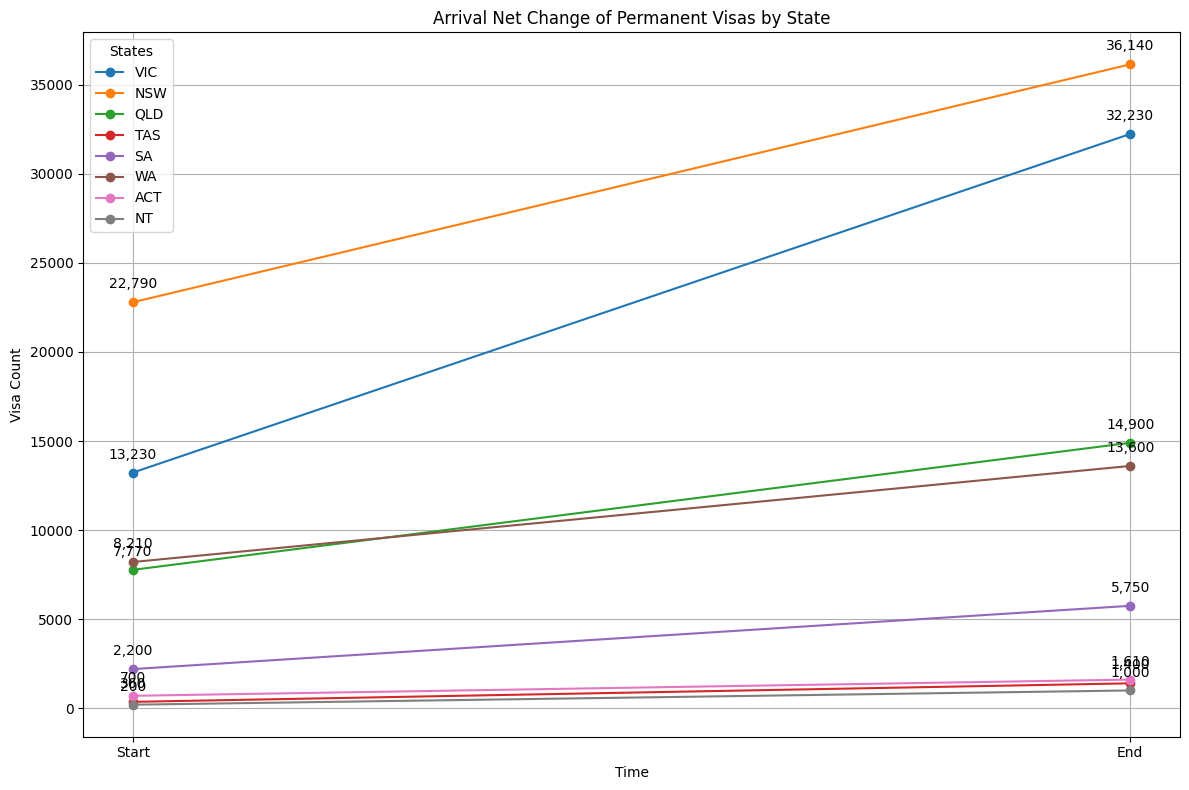

In [30]:
states = ['VIC', 'NSW', 'QLD', 'TAS', 'SA', 'WA', 'ACT', 'NT']
starting_values = [13230, 22790, 7770, 360, 2200, 8210, 700, 200]  # Replace with actual starting values for each state
ending_values = [32230, 36140, 14900, 1400, 5750, 13600, 1610, 1000]  # Replace with actual ending values for each state

# Data for plotting
categories = ['Start', 'End']

plt.figure(figsize=(12, 8))

# Plot data for each state
for i, state in enumerate(states):
    plt.plot(categories, [starting_values[i], ending_values[i]], marker='o', linestyle='-', label=f'{state}')

    # Annotate the points
    plt.annotate(f'{starting_values[i]:,}', (categories[0], starting_values[i]), textcoords="offset points", xytext=(0,10), ha='center')
    plt.annotate(f'{ending_values[i]:,}', (categories[1], ending_values[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Add titles and labels
plt.title('Arrival Net Change of Permanent Visas by State')
plt.xlabel('Time')
plt.ylabel('Visa Count')

# Add a legend
plt.legend(title='States')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

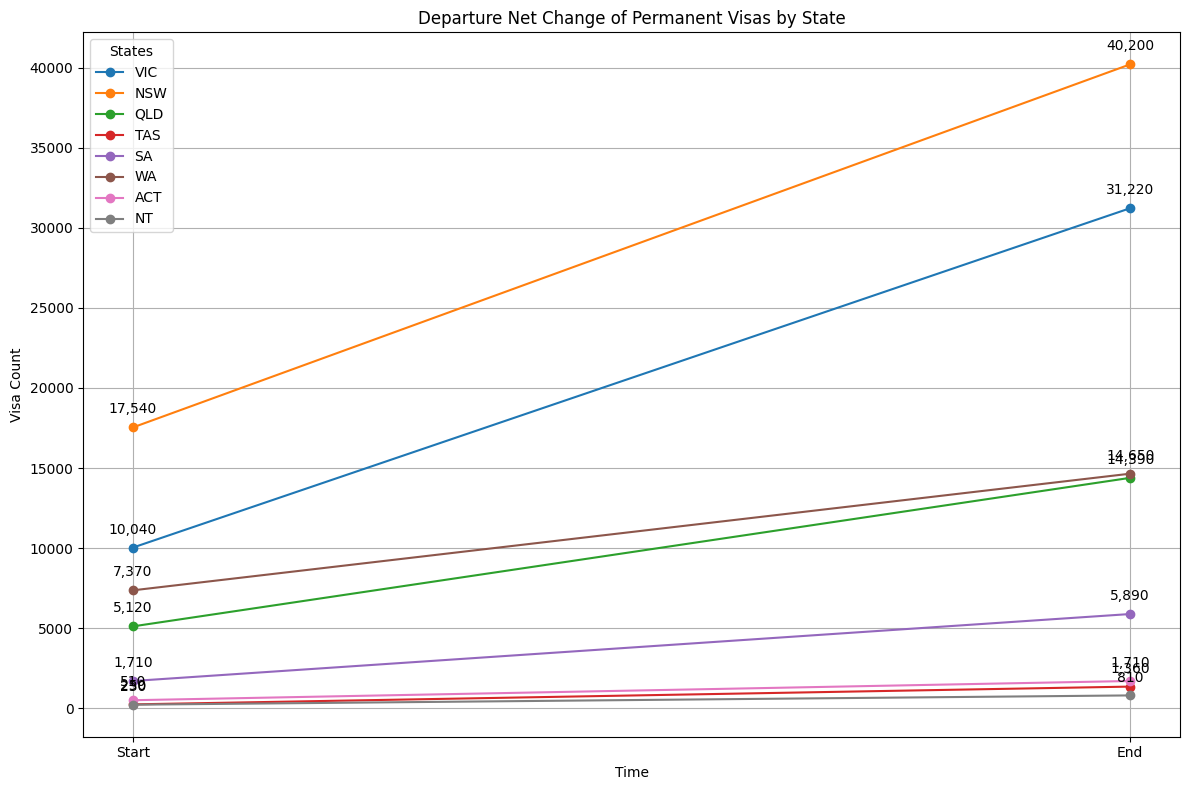

In [31]:
states = ['VIC', 'NSW', 'QLD', 'TAS', 'SA', 'WA', 'ACT', 'NT']
starting_values = [10040, 17540, 5120, 250, 1710, 7370, 510, 230]  # Replace with actual starting values for each state
ending_values = [31220, 40200, 14390, 1360, 5890, 14650, 1710, 810]  # Replace with actual ending values for each state

# Data for plotting
categories = ['Start', 'End']

plt.figure(figsize=(12, 8))

# Plot data for each state
for i, state in enumerate(states):
    plt.plot(categories, [starting_values[i], ending_values[i]], marker='o', linestyle='-', label=f'{state}')

    # Annotate the points
    plt.annotate(f'{starting_values[i]:,}', (categories[0], starting_values[i]), textcoords="offset points", xytext=(0,10), ha='center')
    plt.annotate(f'{ending_values[i]:,}', (categories[1], ending_values[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Add titles and labels
plt.title('Departure Net Change of Permanent Visas by State')
plt.xlabel('Time')
plt.ylabel('Visa Count')

# Add a legend
plt.legend(title='States')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

*Interesting* 

Suprisingly, VIC had a massive decline in it's net change in comparison to NSW. This is because NSW saw an increase in student visa arrivals due to its prestigious universities, targeted scholarships, and strong job market. Effective COVID-19 management and support services also made NSW appealing. In contrast, other states faced declines, possibly due to less effective marketing, fewer incentives, or slower recovery from economic impacts.

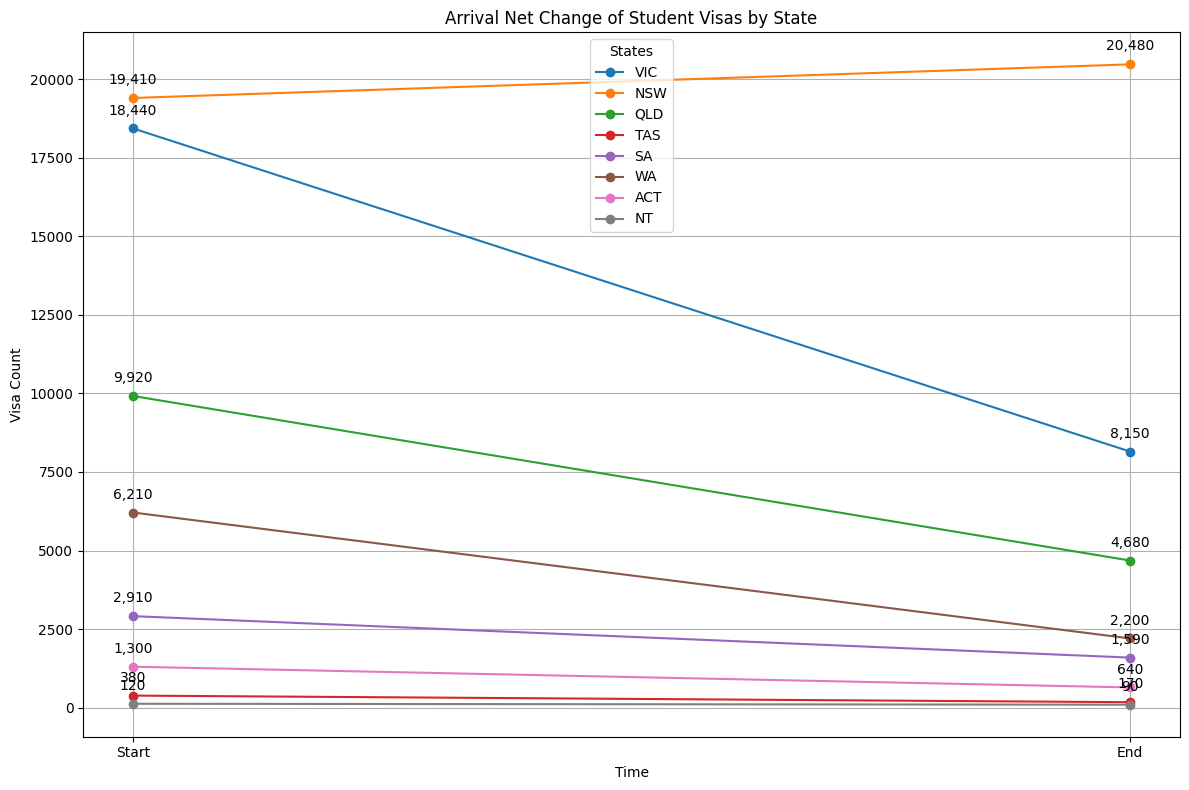

In [50]:
states = ['VIC', 'NSW', 'QLD', 'TAS', 'SA', 'WA', 'ACT', 'NT']
starting_values = [18440, 19410, 9920, 380, 2910, 6210, 1300, 120]  # Replace with actual starting values for each state
ending_values = [8150, 20480, 4680, 170, 1590, 2200, 640, 90]  # Replace with actual ending values for each state

# Data for plotting
categories = ['Start', 'End']

plt.figure(figsize=(12, 8))

# Plot data for each state
for i, state in enumerate(states):
    plt.plot(categories, [starting_values[i], ending_values[i]], marker='o', linestyle='-', label=f'{state}')

    # Annotate the points
    plt.annotate(f'{starting_values[i]:,}', (categories[0], starting_values[i]), textcoords="offset points", xytext=(0,10), ha='center')
    plt.annotate(f'{ending_values[i]:,}', (categories[1], ending_values[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Add titles and labels
plt.title('Arrival Net Change of Student Visas by State')
plt.xlabel('Time')
plt.ylabel('Visa Count')

# Add a legend
plt.legend(title='States')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

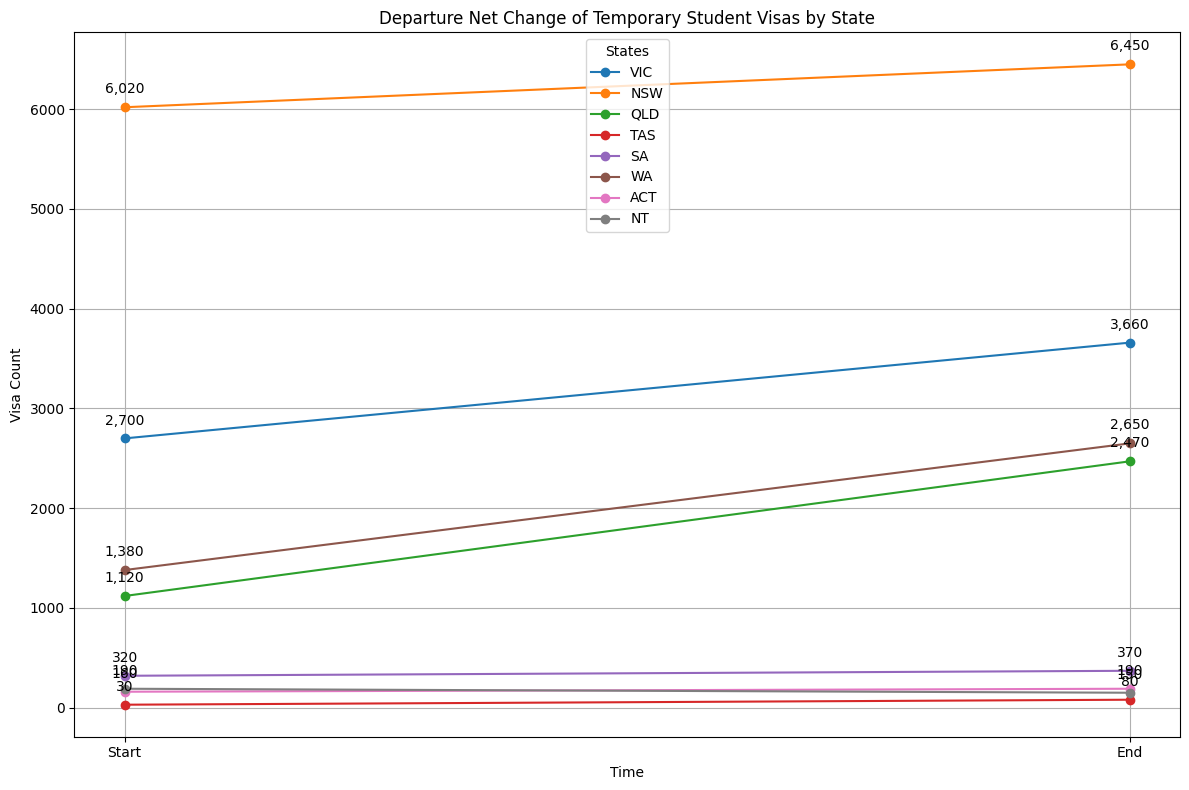

In [49]:
states = ['VIC', 'NSW', 'QLD', 'TAS', 'SA', 'WA', 'ACT', 'NT']
starting_values = [2700, 6020, 1120, 30, 320, 1380, 160, 190]  # Replace with actual starting values for each state
ending_values = [3660, 6450, 2470, 80, 370, 2650, 190, 150]  # Replace with actual ending values for each state

# Data for plotting
categories = ['Start', 'End']

plt.figure(figsize=(12, 8))

# Plot data for each state
for i, state in enumerate(states):
    plt.plot(categories, [starting_values[i], ending_values[i]], marker='o', linestyle='-', label=f'{state}')

    # Annotate the points
    plt.annotate(f'{starting_values[i]:,}', (categories[0], starting_values[i]), textcoords="offset points", xytext=(0,10), ha='center')
    plt.annotate(f'{ending_values[i]:,}', (categories[1], ending_values[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Add titles and labels
plt.title('Departure Net Change of Temporary Student Visas by State')
plt.xlabel('Time')
plt.ylabel('Visa Count')

# Add a legend
plt.legend(title='States')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

The surge in temporary skilled visas across Australia is due to a few key factors. There’s a big need for skilled workers in sectors like healthcare and tech, driven by economic growth and recovery from COVID-19. Also, government policies might have made it easier to get these visas, and Australia’s great quality of life and competitive salaries attract global talent. All these reasons together explain the rise in visa arrivals.

One big surprise was the increase for WA. Again, this is due to the mining industry in WA and its needs for more workers. 

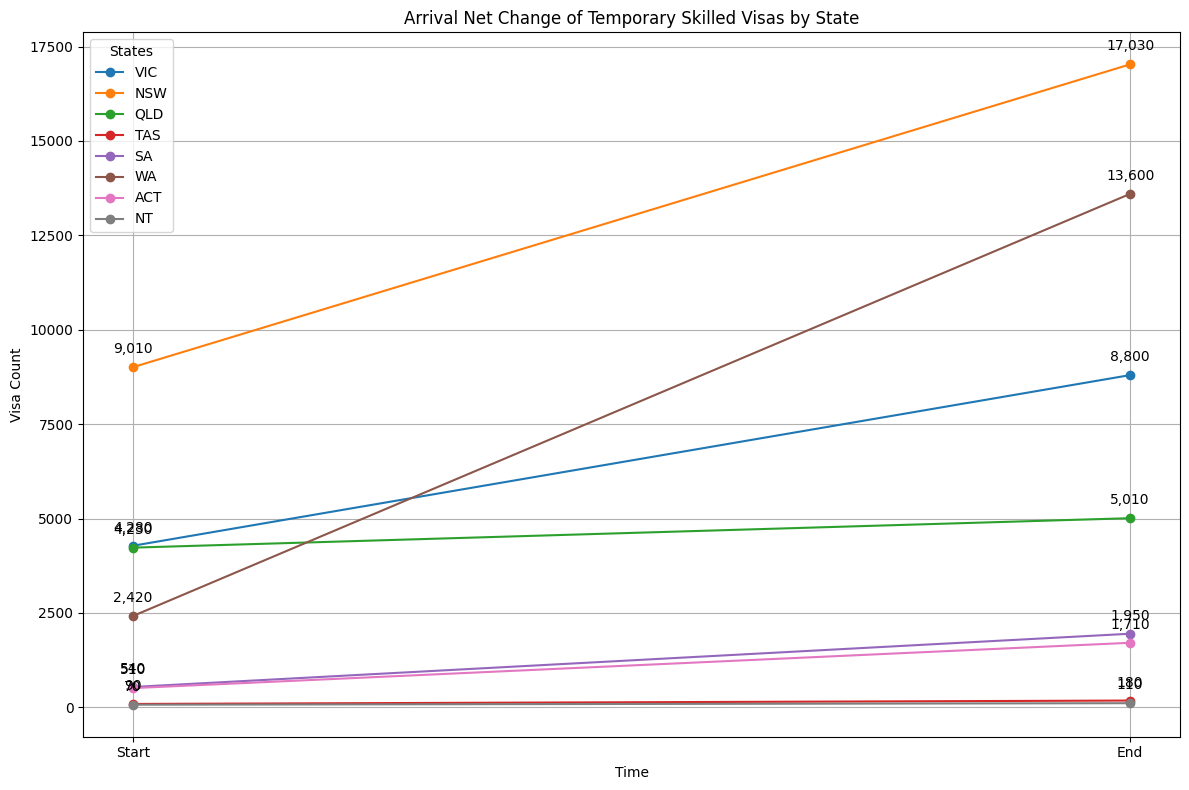

In [51]:
states = ['VIC', 'NSW', 'QLD', 'TAS', 'SA', 'WA', 'ACT', 'NT']
starting_values = [4280, 9010, 4230, 90, 540, 2420, 510, 70]  # Replace with actual starting values for each state
ending_values = [8800, 17030, 5010, 180, 1950, 13600, 1710, 110]  # Replace with actual ending values for each state

# Data for plotting
categories = ['Start', 'End']

plt.figure(figsize=(12, 8))

# Plot data for each state
for i, state in enumerate(states):
    plt.plot(categories, [starting_values[i], ending_values[i]], marker='o', linestyle='-', label=f'{state}')

    # Annotate the points
    plt.annotate(f'{starting_values[i]:,}', (categories[0], starting_values[i]), textcoords="offset points", xytext=(0,10), ha='center')
    plt.annotate(f'{ending_values[i]:,}', (categories[1], ending_values[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Add titles and labels
plt.title('Arrival Net Change of Temporary Skilled Visas by State')
plt.xlabel('Time')
plt.ylabel('Visa Count')

# Add a legend
plt.legend(title='States')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

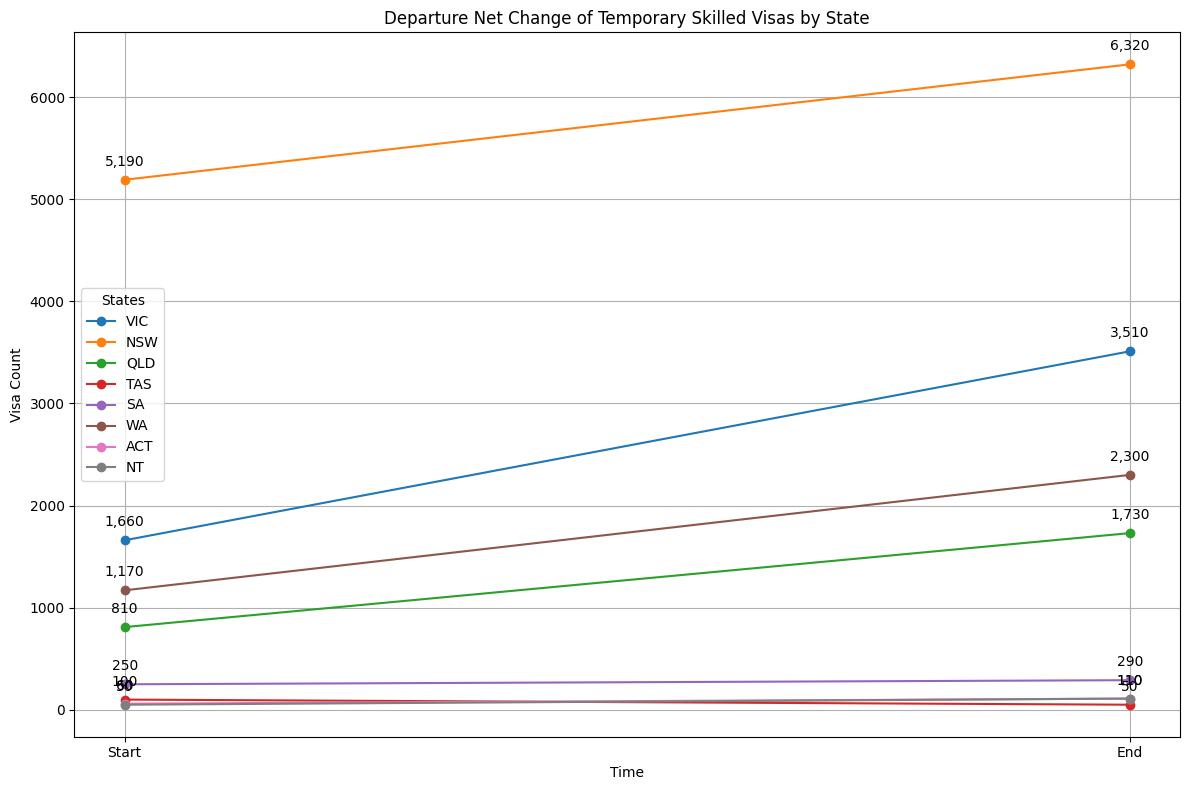

In [47]:
states = ['VIC', 'NSW', 'QLD', 'TAS', 'SA', 'WA', 'ACT', 'NT']
starting_values = [1660, 5190, 810, 100, 250, 1170, 60, 50]  # Replace with actual starting values for each state
ending_values = [3510, 6320, 1730, 50, 290, 2300, 110, 110]  # Replace with actual ending values for each state

# Data for plotting
categories = ['Start', 'End']

plt.figure(figsize=(12, 8))

# Plot data for each state
for i, state in enumerate(states):
    plt.plot(categories, [starting_values[i], ending_values[i]], marker='o', linestyle='-', label=f'{state}')

    # Annotate the points
    plt.annotate(f'{starting_values[i]:,}', (categories[0], starting_values[i]), textcoords="offset points", xytext=(0,10), ha='center')
    plt.annotate(f'{ending_values[i]:,}', (categories[1], ending_values[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Add titles and labels
plt.title('Departure Net Change of Temporary Skilled Visas by State')
plt.xlabel('Time')
plt.ylabel('Visa Count')

# Add a legend
plt.legend(title='States')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

# Conclusion

The three visa categories—Permanent Visas, Temporary Student Visas, and Temporary Skilled Visas—play a crucial role in shaping life in Australia. Permanent Visas offer long-term stability for families and individuals, supporting Australia’s diverse and multicultural society. Temporary Student Visas attract international students who enrich our cultural landscape and help meet the demand for skilled professionals, creating a pipeline for talent to enter the workforce after graduation.

Temporary Skilled Visas are particularly vital for sectors like mining, where about 19% of the workforce is made up of international workers. This helps address critical labour shortages and supports industry growth. Together, these visa categories showcase Australia's commitment to providing opportunities, attracting global talent, and fostering a prosperous, inclusive future. They not only meet immediate labour needs but also strengthen Australia’s identity as a land of opportunity.

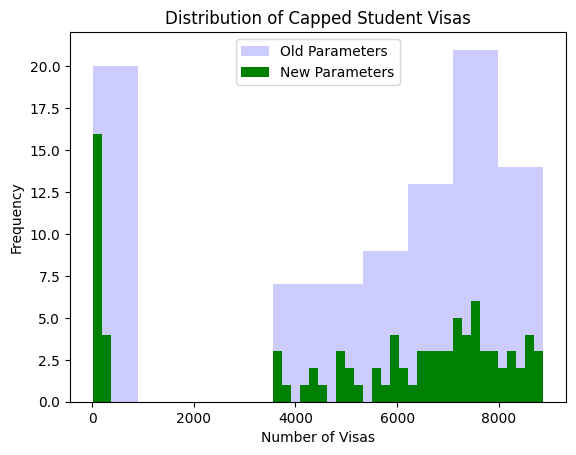

In [36]:
capped_Temp_Student_Visas_data = travel_data_ARR['Temporary Student Visas - Total'][travel_data_ARR['Temporary Student Visas - Total'] < 9000]

# Plot histogram with old parameters
plt.hist(capped_Temp_Student_Visas_data, bins=10, facecolor="blue", alpha=0.2, label='Old Parameters')

# Plot histogram with new parameters
plt.hist(capped_Temp_Student_Visas_data, bins=50, facecolor="green", alpha=1, label='New Parameters')

# Add labels and title
plt.xlabel('Number of Visas')
plt.ylabel('Frequency')
plt.title('Distribution of Capped Student Visas')
plt.legend()

# Display the plot
plt.show()

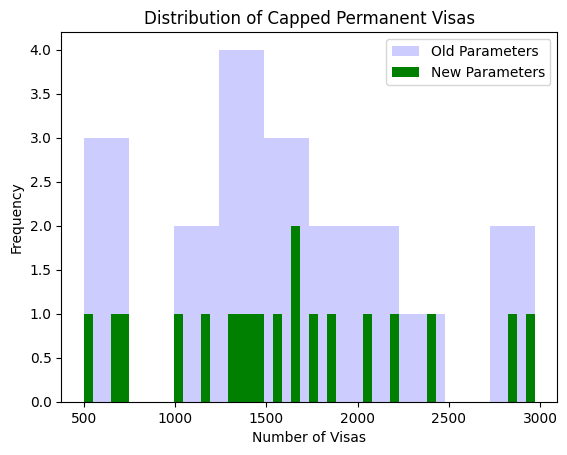

In [37]:
capped_Permanent_Visa_Totals_data = travel_data_DEP["Permanent Visas - Total"][travel_data_DEP["Permanent Visas - Total"] < 3000]

# Plot histogram with old parameters
plt.hist(capped_Permanent_Visa_Totals_data, bins=10, facecolor="blue", alpha=0.2, label='Old Parameters')

# Plot histogram with new parameters
plt.hist(capped_Permanent_Visa_Totals_data, bins=50, facecolor="green", alpha=1, label='New Parameters')

# Add labels and title
plt.xlabel('Number of Visas')
plt.ylabel('Frequency')
plt.title('Distribution of Capped Permanent Visas')
plt.legend()

# Display the plot
plt.show()

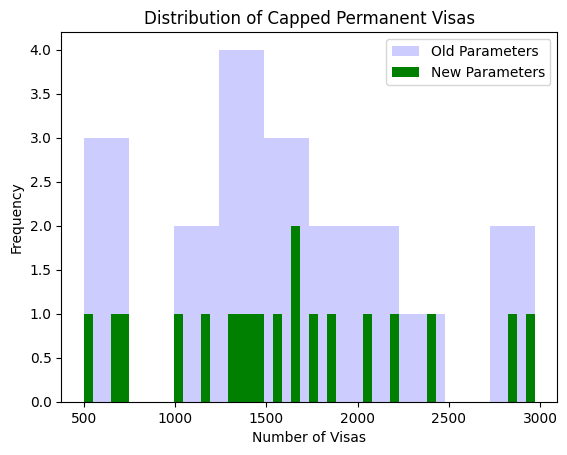

In [38]:
capped_Permanent_Visa_Totals_data = travel_data_DEP["Permanent Visas - Total"][travel_data_DEP["Permanent Visas - Total"] < 3000]

# Plot histogram with old parameters
plt.hist(capped_Permanent_Visa_Totals_data, bins=10, facecolor="blue", alpha=0.2, label='Old Parameters')

# Plot histogram with new parameters
plt.hist(capped_Permanent_Visa_Totals_data, bins=50, facecolor="green", alpha=1, label='New Parameters')

# Add labels and title
plt.xlabel('Number of Visas')
plt.ylabel('Frequency')
plt.title('Distribution of Capped Permanent Visas')
plt.legend()

# Display the plot
plt.show()

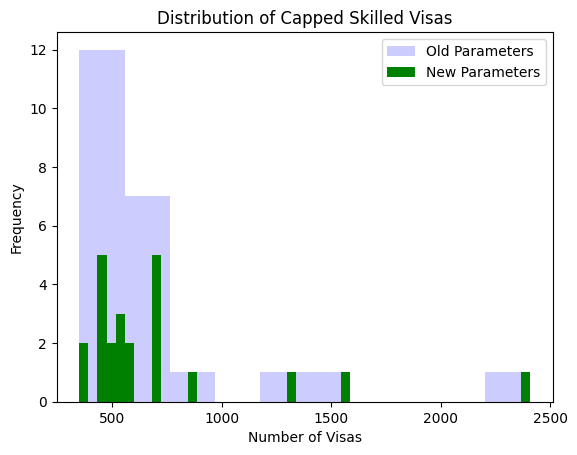

In [39]:
capped_Temp_Skilled_Visas_data = travel_data_DEP["Temporary Skilled Visas"][travel_data_DEP["Temporary Skilled Visas"] < 3000]

# Plot histogram with old parameters
plt.hist(capped_Temp_Skilled_Visas_data, bins=10, facecolor="blue", alpha=0.2, label='Old Parameters')

# Plot histogram with new parameters
plt.hist(capped_Temp_Skilled_Visas_data, bins=50, facecolor="green", alpha=1, label='New Parameters')

# Add labels and title
plt.xlabel('Number of Visas')
plt.ylabel('Frequency')
plt.title('Distribution of Capped Skilled Visas')
plt.legend()

# Display the plot
plt.show()